In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# import geopandas as gpd
import numpy as np
import os
import scipy as sc

In [6]:
file = pd.read_csv('../traffic/Traffic_dataset_v0.1.csv', parse_dates=['DATETIME'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M'))
file.head()

,ID_SENSOR,DIRECTION,DATETIME,NUM_VEHICLES,SPEED_MEAN,SPEED_SD,EVENT,LON,LAT
0,1,A,2018-09-01 02:00:00,NaN,NaN,NaN,NO_EVENT,12.291754,41.800588
1,1,A,2018-09-01 02:15:00,NaN,NaN,NaN,NO_EVENT,12.291754,41.800588
2,1,A,2018-09-01 02:30:00,NaN,NaN,NaN,NO_EVENT,12.291754,41.800588
3,1,A,2018-09-01 02:45:00,NaN,NaN,NaN,NO_EVENT,12.291754,41.800588
4,1,A,2018-09-01 03:00:00,NaN,NaN,NaN,NO_EVENT,12.291754,41.800588


In [7]:
type(file.DATETIME[0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
file.isnull().sum(axis=0)

ID_SENSOR           0
DIRECTION           0
DATETIME            0
NUM_VEHICLES    10575
SPEED_MEAN      10575
SPEED_SD        10578
EVENT               0
LON                 0
LAT                 0
dtype: int64

In [9]:
file_new = file.dropna(subset = ['ID_SENSOR', 'DIRECTION','DATETIME','EVENT', 'LON', 'LAT' ], axis=0, thresh=2)
file_new.shape

(38418, 9)

In [10]:
file_new.EVENT.unique()


array(['NO_EVENT', 'event_cat2', 'event_cat1', 'event_cat3', 'event_cat4'],
      dtype=object)

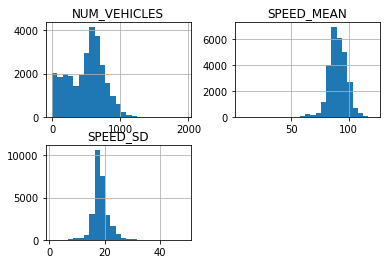

In [11]:
histogram = file_new.drop(['ID_SENSOR', 'DIRECTION','DATETIME','EVENT', 'LON', 'LAT'], axis=1).hist(bins=25 )

In [12]:
file_new.describe()


,ID_SENSOR,NUM_VEHICLES,SPEED_MEAN,SPEED_SD,LON,LAT
count,38418.000000,27843.000000,27843.000000,27840.000000,38418.000000,38418.000000
mean,2.666667,496.849801,90.309755,18.542246,13.502999,40.660086
std,1.247235,258.298296,8.187428,2.785955,1.670502,1.623359
min,1.000000,2.000000,6.600000,1.100000,12.291754,38.364355
25%,1.000000,275.000000,85.600000,17.020000,12.291754,38.364355
50%,3.000000,543.000000,90.200000,18.150000,12.352086,41.800588
75%,4.000000,676.000000,95.800000,19.680000,15.865158,41.815315
max,4.000000,1942.000000,121.800000,48.810000,15.865158,41.815315


In [13]:
file_new=file_new.reset_index()

0 - free flow traffic
1 - traffic
2 - high traffic

In [14]:
t_lev=[]
for i in range(0, file_new.shape[0]):
    if file_new['ID_SENSOR'][i]==1 and file_new['DIRECTION'][i]=='A'or file_new['DIRECTION'][i]=='D':
        if file_new['SPEED_MEAN'][i]>94 :
            t_lev.append(0)
        elif file_new['SPEED_MEAN'][i] in range (89, 94):
            t_lev.append(1)
        elif file_new['SPEED_MEAN'][i]<=89:
            t_lev.append(2)
    elif file_new['ID_SENSOR'][i]==3:
        if (file_new['DIRECTION'][i]=='A' and file_new['SPEED_MEAN'][i]>83) or (file_new['DIRECTION'][i]=='D' and file_new['SPEED_MEAN'][i]>68):
             t_lev.append(0)
        elif (file_new['DIRECTION'][i]=='A' and file_new['SPEED_MEAN'][i] in range (78, 84))or (file_new['DIRECTION'][i]=='D' and file_new['SPEED_MEAN'][i] in range (62,69)):
             t_lev.append(1)
        elif (file_new['DIRECTION'][i]=='A' and file_new['SPEED_MEAN'][i]<=78) or (file_new['DIRECTION'][i]=='D' and file_new['SPEED_MEAN'][i]<=62) :
             t_lev.append(2)
    else:
        if (file_new['DIRECTION'][i]=='A' and file_new['SPEED_MEAN'][i]>80)or (file_new['DIRECTION'][i]=='D' and file_new['SPEED_MEAN'][i]>77):
             t_lev.append(0)
        elif (file_new['DIRECTION'][i]=='A' and file_new['SPEED_MEAN'][i]in range (75, 81)) or (file_new['DIRECTION'][i]=='D' and file_new['SPEED_MEAN'][i] in range (72,78)):
             t_lev.append(1)
        elif (file_new['DIRECTION'][i]=='A' and file_new['SPEED_MEAN'][i]<=75) or (file_new['DIRECTION'][i]=='D' and file_new['SPEED_MEAN'][i]<=72) :
             t_lev.append(2)

In [15]:
for i in range(0, file_new.shape[0]):
    if file_new['ID_SENSOR'][i]==1:
        print(1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [16]:
# number of cluster
wss_val = []
bss_val = []
k_val = range(1,20)

for k in k_val:
    clustering = fcluster(z, k, criterion='maxclust')
    centroids = [np.mean(x[clustering==c],axis=0) for c in range(1,k+1)]
    cdist(x, centroids, 'euclidean')
    D = cdist(x, centroids, 'euclidean')
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)
     
avgWithinSS = sum(d)/x.shape[0]
wss = sum(d**2)
tss = sum(pdist(x)**2)/x.shape[0]
bss = tss-wss
wss_val += [wss]
bss_val += [bss]

NameError: name 'fcluster' is not defined